<a href="https://colab.research.google.com/github/AmulyaMurududdi/Data-Analysis-on-Movies-dataset-using-Hadoop-Hive-and-Spark-/blob/main/Big_data_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyspark

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

In [6]:
!pip install plotly


In [7]:
from pyspark import SparkContext
from pyspark.sql import HiveContext
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession, HiveContext

# Create a SparkSession
spark = SparkSession.builder.appName("Movies").enableHiveSupport().getOrCreate()

# Create a HiveContext using the SparkSession
hiveContext = HiveContext(spark)

/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:733: FutureWarning: HiveContext is deprecated in Spark 2.0.0. Please use SparkSession.builder.enableHiveSupport().getOrCreate() instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
#spark.sql("""
# CREATE TABLE IF NOT EXISTS movies_table (
# name STRING,rating STRING,genre STRING,
# year  INT,released DATE,score DOUBLE,
#vote INT,director STRING,writer STRING
#star STING, country STRING,Budget INT,
#gross LONGINT,company STRING, runtime INT )
#    ROW FORMAT DELIMITED FIELDS TERMINATED BY ','
#    STORED AS TEXTFILE
#""")
#You can insert data into Hive tables from other Spark DataFrames:
#df.write.insertInto("your_table_name")

In [8]:
# Loading the file
file_path="/content/movies.csv"
 #Read the CSV file into a Spark DataFrame
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [9]:
# Check for missing values
from pyspark.sql.functions import isnan, when, count, col
missing_values = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+
|name|rating|genre|year|released|score|votes|director|writer|star|country|budget|gross|company|runtime|
+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+
|   0|    77|    0|   0|       2|    3|    3|       0|     3|   1|      3|  2171|  189|     17|      4|
+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+



In [10]:
# Drop duplicate rows
df = df.dropDuplicates()

In [11]:

movies_df = df.na.fill({'rating': 'Not Rated'})
filtered_movies = movies_df.filter((col('rating') == 'Not Rated') & (col('genre') == 'Romance')).select('name')
filtered_movies.show(truncate=False)


+----------------+
|name            |
+----------------+
|The Piano Player|
|36 fillette     |
|L'ennui         |
+----------------+



In [12]:
# Define a dictionary with column names and their corresponding default values or logic
default_values = {
    'rating':'Not Rated',
    'released': 'June 1, 2001 (United States)',
    'score': 0,
    'votes': 0,
    'writer': 'NA',
    'star': 'NA',
    'country': 'NA',
    'budget': 5000000,
    'gross': 5000000,
    'company': 'NA',
    'runtime': 0
}

# Fill missing values using fillna
df = df.fillna(default_values)

# Show the updated DataFrame
df.show(truncate=False)


+-------------------------------------+-------+---------+----+----------------------------------+-----+--------+-----------------+------------------+-----------------+--------------+---------+-------------+-------------------------------------------+-------+
|name                                 |rating |genre    |year|released                          |score|votes   |director         |writer            |star             |country       |budget   |gross        |company                                    |runtime|
+-------------------------------------+-------+---------+----+----------------------------------+-----+--------+-----------------+------------------+-----------------+--------------+---------+-------------+-------------------------------------------+-------+
|Caddyshack                           |R      |Comedy   |1980|July 25, 1980 (United States)     |7.3  |108000.0|Harold Ramis     |Brian Doyle-Murray|Chevy Chase      |United States |6000000.0|3.9846344E7  |Orion Pictures   

In [13]:
# Check for missing values
from pyspark.sql.functions import isnan, when, count, col
missing_values = movies_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+
|name|rating|genre|year|released|score|votes|director|writer|star|country|budget|gross|company|runtime|
+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+
|   0|     0|    0|   0|       2|    3|    3|       0|     3|   1|      3|  2171|  189|     17|      4|
+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+



In [14]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- rating: string (nullable = false)
 |-- genre: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- released: string (nullable = false)
 |-- score: double (nullable = false)
 |-- votes: double (nullable = false)
 |-- director: string (nullable = true)
 |-- writer: string (nullable = false)
 |-- star: string (nullable = false)
 |-- country: string (nullable = false)
 |-- budget: double (nullable = false)
 |-- gross: double (nullable = false)
 |-- company: string (nullable = false)
 |-- runtime: double (nullable = false)



In [15]:
# Register the DataFrame as a global temporary view
movies_df.createOrReplaceGlobalTempView("movies_view")

In [16]:
# Check for missing values
from pyspark.sql.functions import isnan, when, count, col
missing_values = movies_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
missing_values.show()

+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+
|name|rating|genre|year|released|score|votes|director|writer|star|country|budget|gross|company|runtime|
+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+
|   0|     0|    0|   0|       2|    3|    3|       0|     3|   1|      3|  2171|  189|     17|      4|
+----+------+-----+----+--------+-----+-----+--------+------+----+-------+------+-----+-------+-------+



In [17]:

# Assuming spark is your SparkSession
result = spark.sql("SELECT * FROM global_temp.movies_view")
result.show()

+--------------------+-------+---------+----+--------------------+-----+--------+-----------------+------------------+-----------------+--------------+---------+-------------+--------------------+-------+
|                name| rating|    genre|year|            released|score|   votes|         director|            writer|             star|       country|   budget|        gross|             company|runtime|
+--------------------+-------+---------+----+--------------------+-----+--------+-----------------+------------------+-----------------+--------------+---------+-------------+--------------------+-------+
|          Caddyshack|      R|   Comedy|1980|July 25, 1980 (Un...|  7.3|108000.0|     Harold Ramis|Brian Doyle-Murray|      Chevy Chase| United States|6000000.0|  3.9846344E7|      Orion Pictures|   98.0|
|       The Stunt Man|      R|   Action|1980|June 27, 1980 (Un...|  7.1|  9000.0|     Richard Rush|Lawrence B. Marcus|    Peter O'Toole| United States|3500000.0|    7063886.0|Melvi

In [18]:
# Movies Released Over the Years
movies_per_year = movies_df.groupBy("year").count().orderBy("year")
movies_per_year.show()

+----+-----+
|year|count|
+----+-----+
|1980|   92|
|1981|  113|
|1982|  126|
|1983|  144|
|1984|  168|
|1985|  200|
|1986|  200|
|1987|  200|
|1988|  200|
|1989|  200|
|1990|  200|
|1991|  200|
|1992|  200|
|1993|  200|
|1994|  200|
|1995|  200|
|1996|  200|
|1997|  200|
|1998|  200|
|1999|  200|
+----+-----+
only showing top 20 rows



In [19]:
# Movies by Company
movies_by_company = movies_df.groupBy("company").count().orderBy(col("count").desc()).limit(10)
movies_by_company.show()

+--------------------+-----+
|             company|count|
+--------------------+-----+
|  Universal Pictures|  377|
|        Warner Bros.|  334|
|   Columbia Pictures|  332|
|  Paramount Pictures|  320|
|Twentieth Century...|  240|
|     New Line Cinema|  174|
| Touchstone Pictures|  132|
|Metro-Goldwyn-May...|  125|
|Walt Disney Pictures|  123|
|    TriStar Pictures|   94|
+--------------------+-----+



In [20]:
# Writers with Most Movies
top_writers = movies_df.groupBy("writer").count().orderBy(col("count").desc()).limit(10)
top_writers.show()

+-------------------+-----+
|             writer|count|
+-------------------+-----+
|        Woody Allen|   37|
|       Stephen King|   31|
|         Luc Besson|   26|
|        John Hughes|   25|
|William Shakespeare|   15|
|        David Mamet|   15|
|    Pedro Almodóvar|   13|
|          Joel Coen|   13|
|         Wes Craven|   12|
|   Michael Crichton|   12|
+-------------------+-----+



In [21]:
top_stars = movies_df.groupBy("star").count().orderBy(col("count").desc()).limit(10)
top_stars.show()

+------------------+-----+
|              star|count|
+------------------+-----+
|      Nicolas Cage|   43|
|         Tom Hanks|   41|
|    Robert De Niro|   41|
| Denzel Washington|   37|
|      Bruce Willis|   34|
|        Tom Cruise|   34|
|       Johnny Depp|   33|
|Sylvester Stallone|   32|
|     John Travolta|   31|
|        Mel Gibson|   29|
+------------------+-----+



In [22]:
# Check for null values in "budget" and "gross" columns
movies_df.select("budget", "gross").filter(col("budget").isNull() | col("gross").isNull()).show()

+---------+------------+
|   budget|       gross|
+---------+------------+
|     NULL| 4.1675194E7|
|     NULL|   2977706.0|
|     NULL|   4743119.0|
|5000000.0|        NULL|
|     NULL|    612781.0|
|     NULL|   8341087.0|
|     NULL|   1724806.0|
|     NULL| 7.7912251E7|
|     NULL| 1.1897978E7|
|     NULL|   7121719.0|
|     NULL|    337812.0|
|     NULL|  2.762731E7|
|     NULL| 2.8738096E7|
|     NULL|    247202.0|
|     NULL|   3828405.0|
|     NULL|1.19718203E8|
|     NULL|   1012804.0|
|  58750.0|        NULL|
|     NULL|      1.41E7|
|     NULL|   2015882.0|
+---------+------------+
only showing top 20 rows



In [23]:
# Explore Patterns: Genre-wise Analysis
genre_analysis_df = movies_df.groupBy("genre").agg({"score": "avg", "votes": "sum"}).orderBy("avg(score)", ascending=False)
genre_analysis_df.show()

+---------+------------------+------------+
|    genre|        avg(score)|  sum(votes)|
+---------+------------------+------------+
|  History|               8.3|        79.0|
|  Musical|              8.05|       962.0|
|    Music|               7.2|     12000.0|
|Biography| 7.030925507900679| 4.0057318E7|
|Animation| 6.769230769230771| 4.3153458E7|
|    Drama| 6.693667546174147|1.05822171E8|
|    Crime| 6.671506352087111| 5.0102551E7|
|  Mystery| 6.665000000000001|   4602515.0|
|  Romance| 6.409999999999999|    359974.0|
|   Family| 6.363636363636363|    753550.0|
|Adventure| 6.291569086651049| 4.3358242E7|
|   Sci-Fi|              6.21|    884930.0|
|   Action| 6.202816901408457|2.39541188E8|
|   Comedy| 6.193986636971058|1.21865748E8|
|  Fantasy| 6.006818181818182|   2587900.0|
| Thriller|5.9125000000000005|    318891.0|
|    Sport|               5.9|       691.0|
|   Horror| 5.750621118012424| 2.1923322E7|
|  Western| 5.666666666666667|      6199.0|
+---------+------------------+--

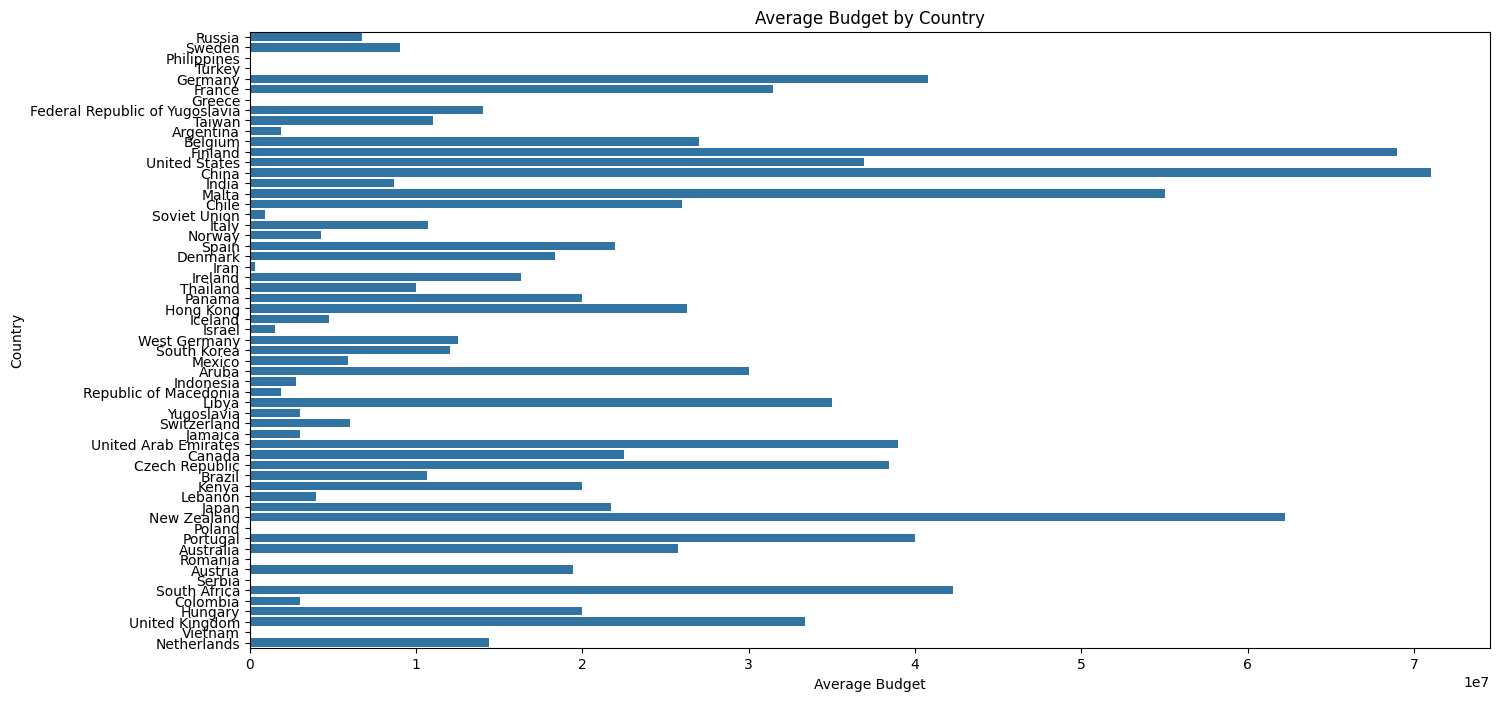

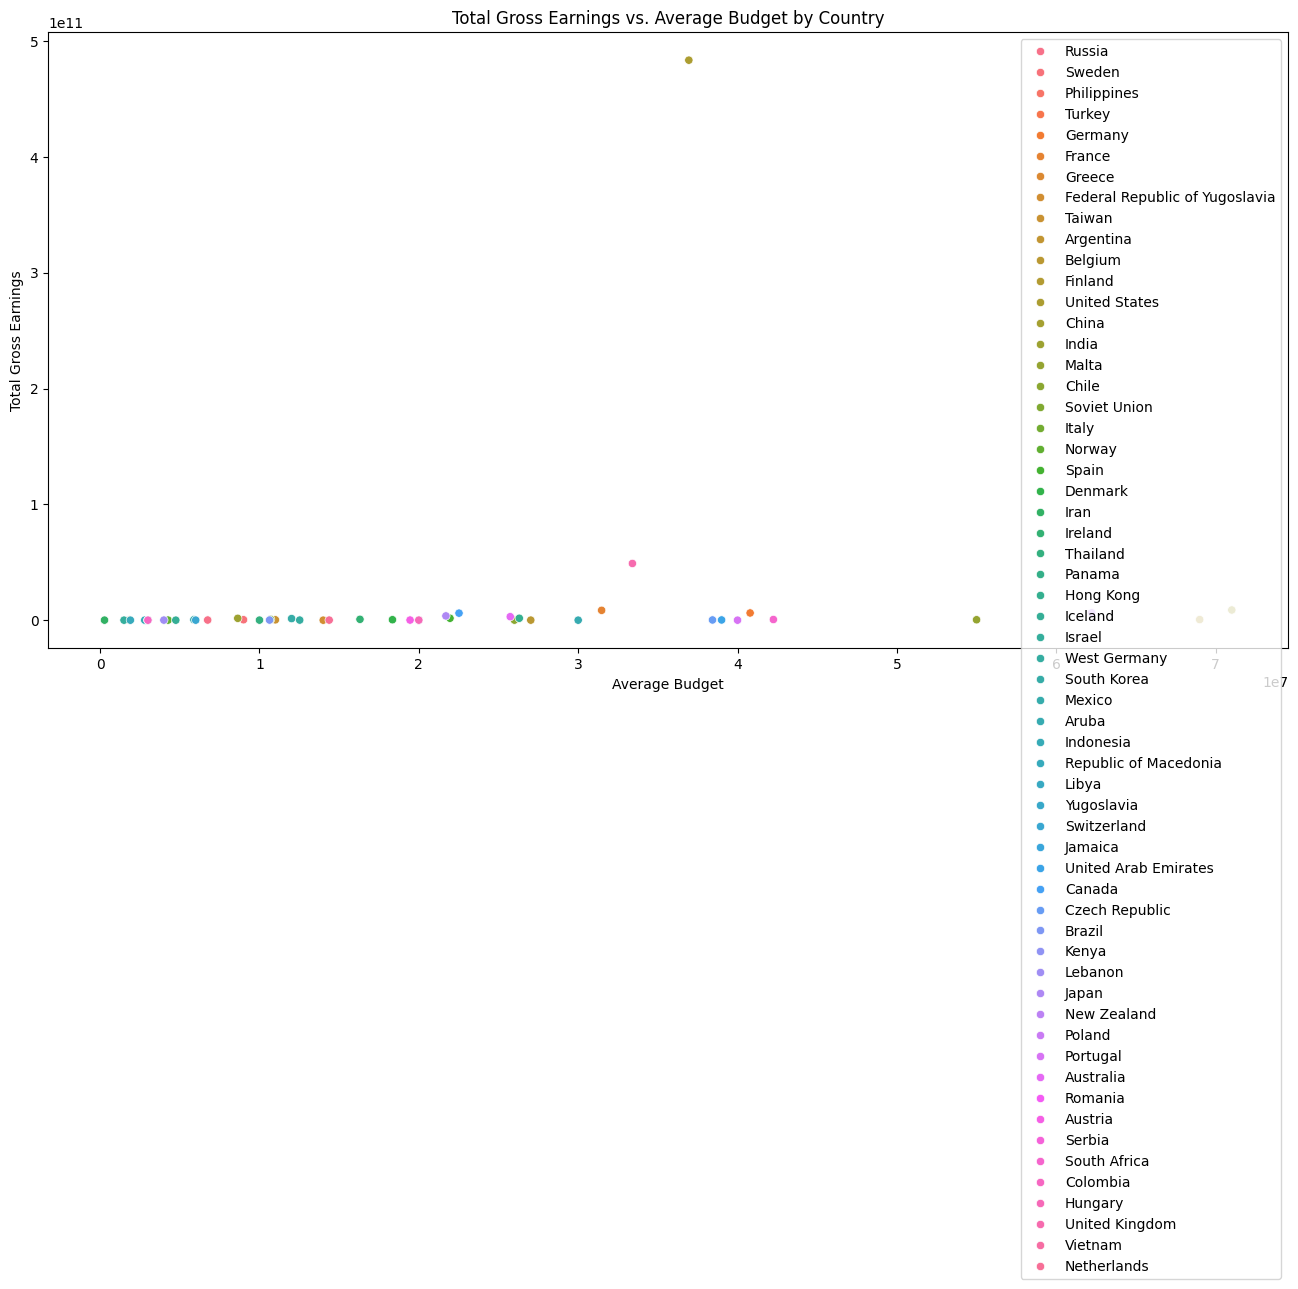

In [24]:
# Group by country and calculate average budget and total gross earnings
import matplotlib.pyplot as plt
import seaborn as sns
# Group by country and calculate average budget and total gross earnings
budget_vs_gross_by_country_df = movies_df.groupBy("country").agg({"budget": "avg", "gross": "sum"})

# Bar plot for average budget by country
plt.figure(figsize=(16, 8))  # Increase figsize
sns.barplot(x="avg(budget)", y="country", data=budget_vs_gross_by_country_df.toPandas())
plt.title("Average Budget by Country")
plt.xlabel("Average Budget")
plt.ylabel("Country")

# Scatter plot for total gross earnings vs. average budget by country
plt.figure(figsize=(16, 8))  # Increase figsize
sns.scatterplot(x="avg(budget)", y="sum(gross)", hue="country", data=budget_vs_gross_by_country_df.toPandas())
plt.title("Total Gross Earnings vs. Average Budget by Country")
plt.xlabel("Average Budget")
plt.ylabel("Total Gross Earnings")
plt.legend()
plt.show()



<ipython-input-25-fd848e35f468>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="genre", y="avg(score)", data=genre_year_ratings_pandas, palette="husl", inner="quartile")


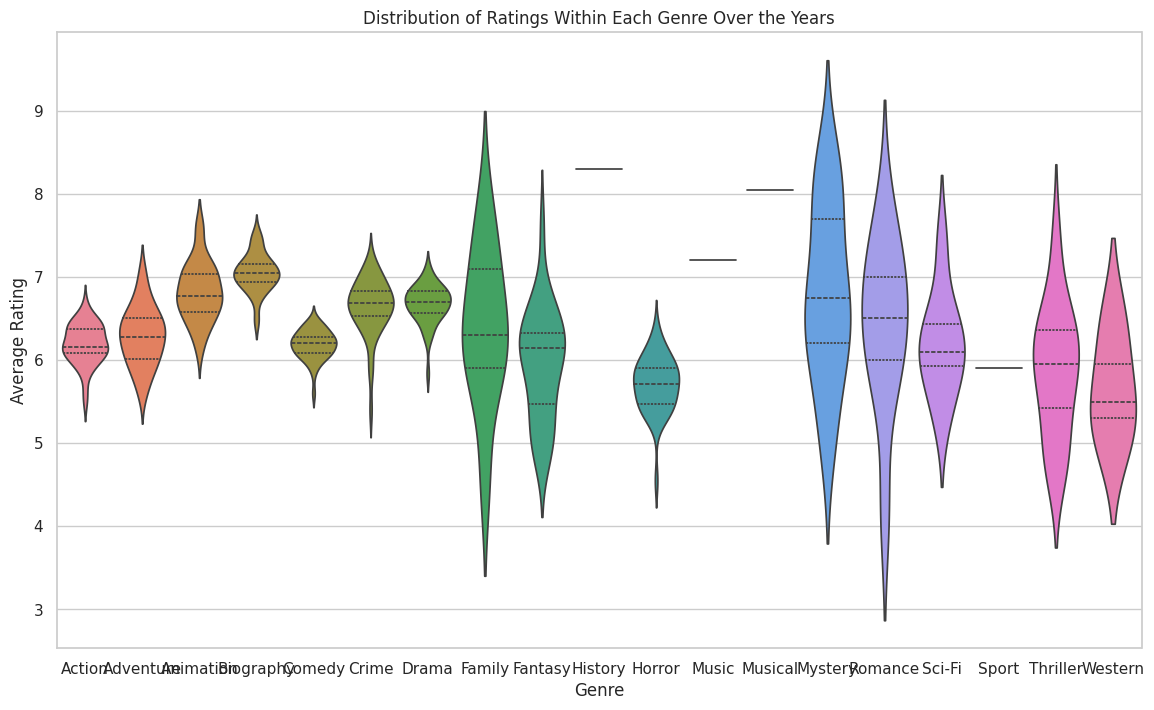

In [25]:
# Group by genre and year, calculate average rating
genre_year_ratings_df = movies_df.groupBy("genre", "year").agg({"score": "avg"}).orderBy("genre", "year")

# Convert PySpark DataFrame to Pandas for plotting
genre_year_ratings_pandas = genre_year_ratings_df.toPandas()

# Set the seaborn style
sns.set(style="whitegrid")

# Create a violin plot for the distribution of ratings within each genre over the years
plt.figure(figsize=(14, 8))
sns.violinplot(x="genre", y="avg(score)", data=genre_year_ratings_pandas, palette="husl", inner="quartile")

plt.title("Distribution of Ratings Within Each Genre Over the Years")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()

In [26]:
# Renaming the columns to make sure there are no spaces
genre_analysis_df = genre_analysis_df.withColumnRenamed("avg(score)", "avg_rating").withColumnRenamed("sum(votes)", "total_votes")

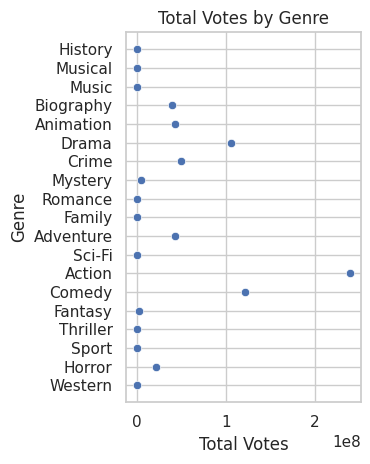

In [27]:
# Scatter Plot: Total Votes by Genre
plt.subplot(1, 2, 2)
sns.scatterplot(x="total_votes", y="genre", data=genre_analysis_df.toPandas())
plt.title("Total Votes by Genre")
plt.xlabel("Total Votes")
plt.ylabel("Genre")

plt.tight_layout()
plt.show()

<ipython-input-28-4a8d59861e64>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="avg(score)", y="director", data=director_ratings_df.toPandas().head(10), palette=custom_palette)


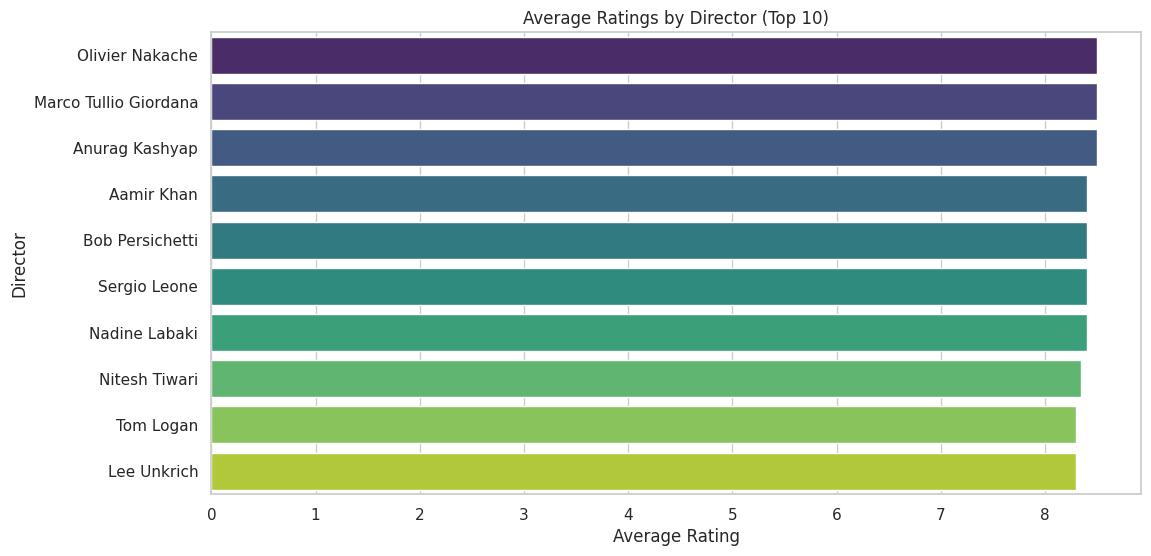

In [28]:
# Group by director and calculate average rating and total number of movies
director_ratings_df = movies_df.groupBy("director").agg({"score": "avg", "name": "count"}).orderBy("avg(score)", ascending=False)

# Set a different color palette
custom_palette = sns.color_palette("viridis", len(director_ratings_df.toPandas().head(10)))

# Bar plot for average rating by director
plt.figure(figsize=(12, 6))
sns.barplot(x="avg(score)", y="director", data=director_ratings_df.toPandas().head(10), palette=custom_palette)
plt.title("Average Ratings by Director (Top 10)")
plt.xlabel("Average Rating")
plt.ylabel("Director")
plt.show()

Text(0, 0.5, 'Genre')

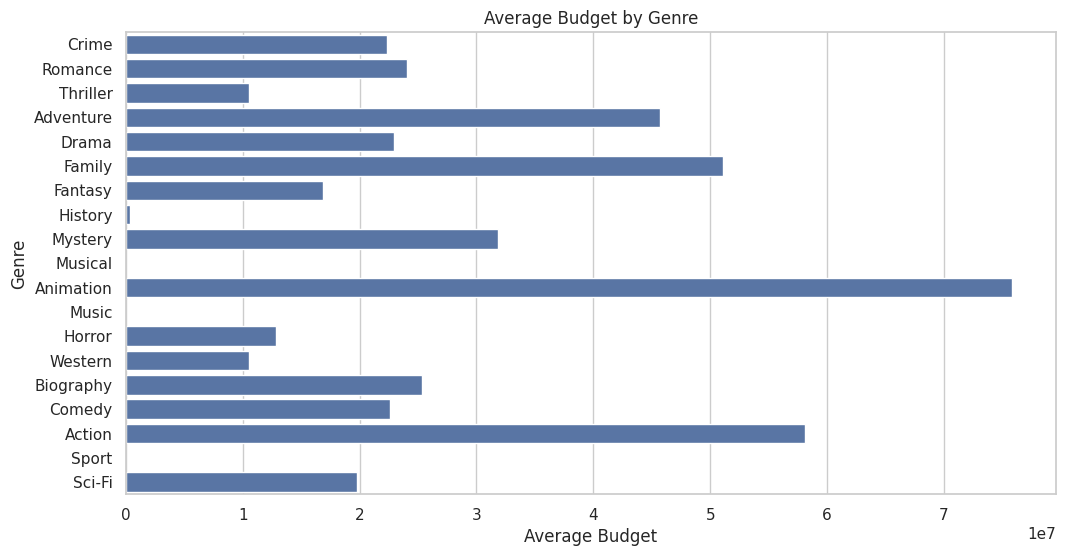

In [29]:
# Group by genre and calculate average budget and total gross earnings
budget_vs_gross_df = movies_df.groupBy("genre").agg({"budget": "avg", "gross": "sum"})

# Bar plot for average budget by genre
plt.figure(figsize=(12, 6))
sns.barplot(x="avg(budget)", y="genre", data=budget_vs_gross_df.toPandas())
plt.title("Average Budget by Genre")
plt.xlabel("Average Budget")
plt.ylabel("Genre")

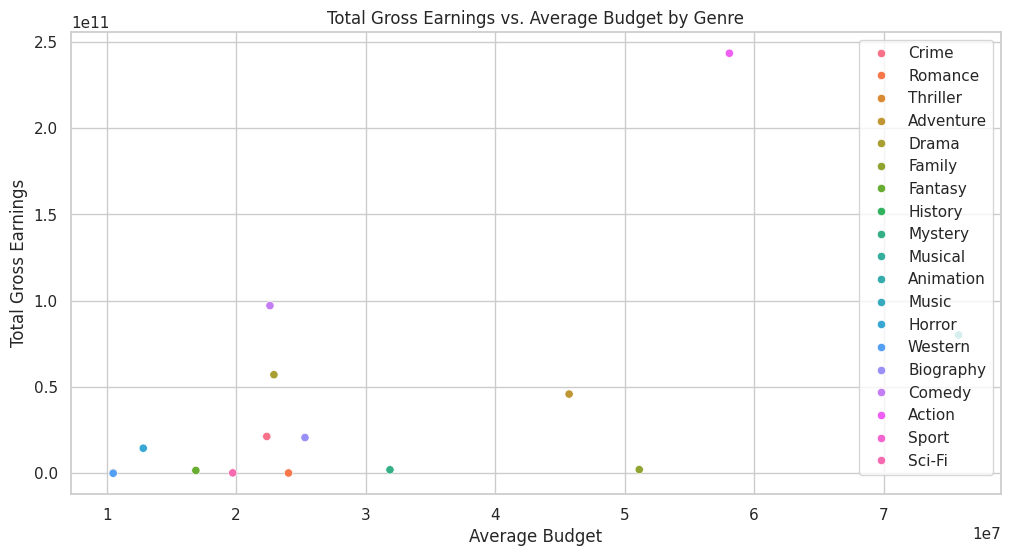

In [30]:
# Scatter plot for total gross earnings vs. average budget by genre
plt.figure(figsize=(12, 6))
sns.scatterplot(x="avg(budget)", y="sum(gross)", hue="genre", data=budget_vs_gross_df.toPandas())
plt.title("Total Gross Earnings vs. Average Budget by Genre")
plt.xlabel("Average Budget")
plt.ylabel("Total Gross Earnings")
plt.legend()
plt.show()

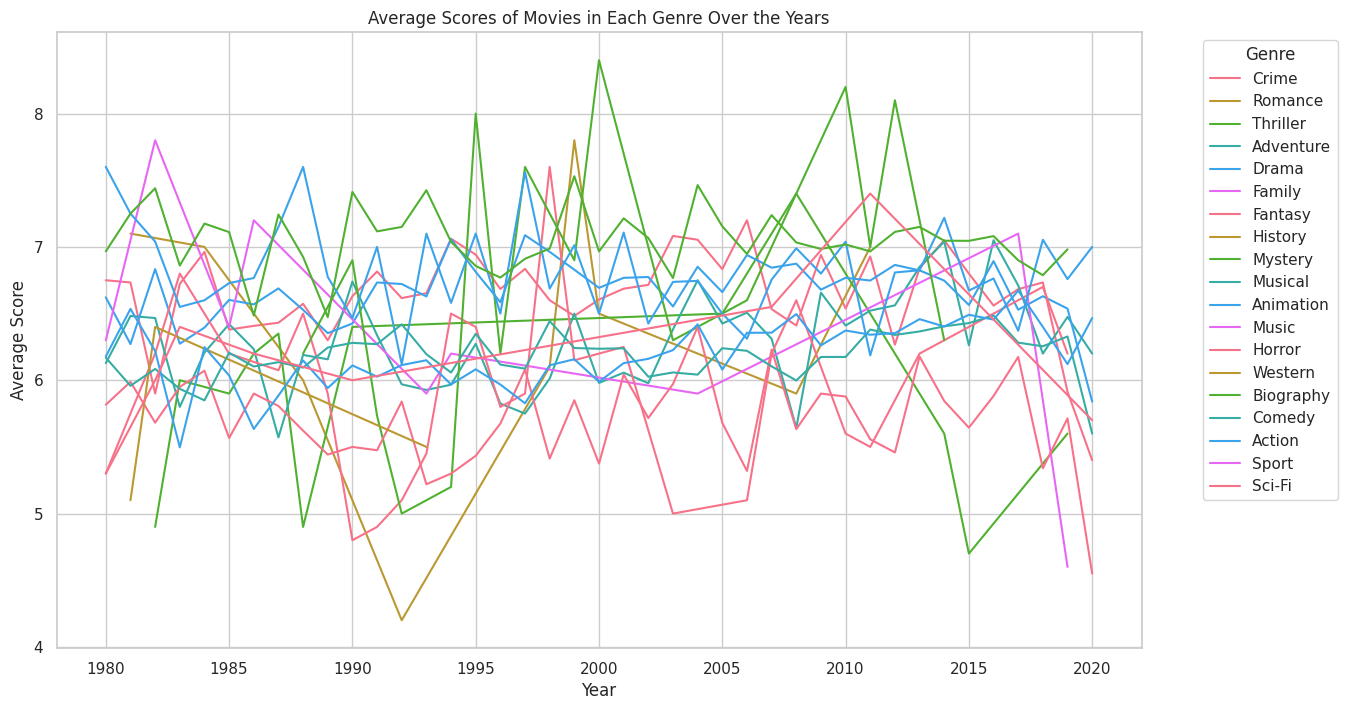

In [31]:
# Group by genre and year, calculate average score
genre_year_scores_df = movies_df.groupBy("genre", "year").agg({"score": "avg"}).orderBy("genre", "year")

# Plotting line charts for scores of movies in each genre over the years
plt.figure(figsize=(14, 8))
sns.set_palette("husl")  # Set color palette

# Iterate through genres
for genre in genre_year_scores_df.select("genre").distinct().rdd.flatMap(lambda x: x).collect():
    genre_data = genre_year_scores_df.filter(col("genre") == genre).toPandas()
    sns.lineplot(x="year", y="avg(score)", data=genre_data, label=genre)

plt.title("Average Scores of Movies in Each Genre Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

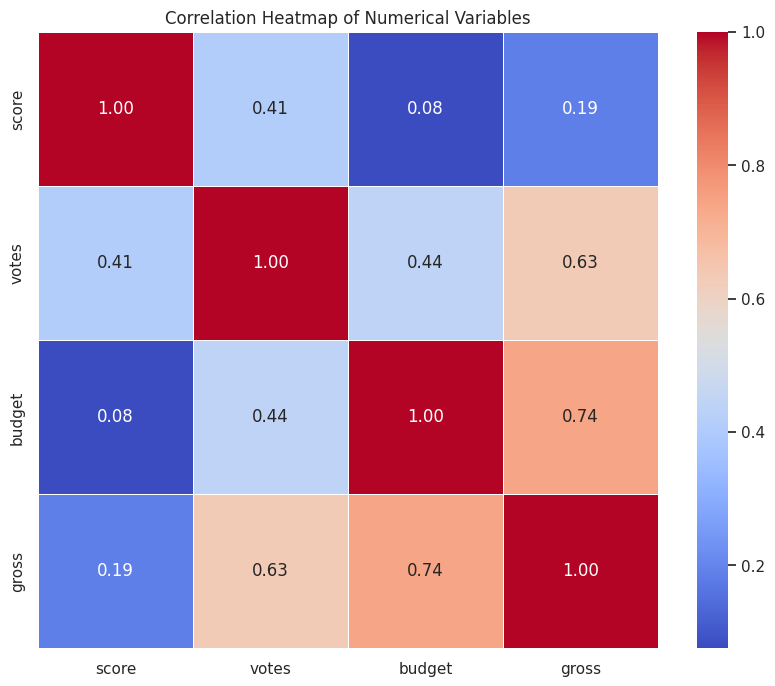

In [34]:
# Map on score, votes, budget and gross
numerical_columns = ['score', 'votes', 'budget', 'gross']
numerical_df = movies_df.select(*numerical_columns)

# Calculate the correlation matrix
correlation_matrix = numerical_df.toPandas().corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()